In [ ]:
pwd

'/content/data'

In [ ]:
mkdir data

In [ ]:
cd data

/content/data


各種ライブラリのインポート

In [ ]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

 matplotlib日本語化のためのライブラリのインストール

In [ ]:
!pip install japanize-matplotlib

CSVファイルを読み込み、先頭20件を表示

In [ ]:
df = pd.read_csv('auto_mgp.csv')
df.head(20)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,0,18.0,8,307.0,130.0,3504,12.0,70,1
1,1,15.0,8,350.0,165.0,3693,11.5,70,1
2,2,18.0,8,318.0,150.0,3436,11.0,70,1
3,3,16.0,8,304.0,150.0,3433,12.0,70,1
4,4,17.0,8,302.0,140.0,3449,10.5,70,1
5,5,15.0,8,429.0,198.0,4341,10.0,70,1
6,6,14.0,8,454.0,220.0,4354,9.0,70,1
7,7,14.0,8,440.0,215.0,4312,8.5,70,1
8,8,14.0,8,455.0,225.0,4425,10.0,70,1
9,9,15.0,8,390.0,190.0,3850,8.5,70,1


行数と列数を確認

In [ ]:
df.shape

(398, 9)

Originの値別の件数を確認

In [ ]:
df['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

Originをダミー変数化（Originは文字列データではありませんが、その性質上、ダミー変数化が必要と考えました→これをカテゴリー特徴量というのか・・・）

In [ ]:
dm1 = pd.get_dummies(df['Origin'], drop_first = True)
df2 = pd.concat([df, dm1], axis = 1)
df2 = df2.drop(['Origin'], axis = 1)
df2.head(20)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,2,3
0,0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,4,17.0,8,302.0,140.0,3449,10.5,70,0,0
5,5,15.0,8,429.0,198.0,4341,10.0,70,0,0
6,6,14.0,8,454.0,220.0,4354,9.0,70,0,0
7,7,14.0,8,440.0,215.0,4312,8.5,70,0,0
8,8,14.0,8,455.0,225.0,4425,10.0,70,0,0
9,9,15.0,8,390.0,190.0,3850,8.5,70,0,0


ダミー変数化した列の列名を変更

In [ ]:
df2 = df2.rename(columns={2: 'eu'})
df2 = df2.rename(columns={3: 'ja'})
df2.head(20)

,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,eu,ja
0,0,18.0,8,307.0,130.0,3504,12.0,70,0,0
1,1,15.0,8,350.0,165.0,3693,11.5,70,0,0
2,2,18.0,8,318.0,150.0,3436,11.0,70,0,0
3,3,16.0,8,304.0,150.0,3433,12.0,70,0,0
4,4,17.0,8,302.0,140.0,3449,10.5,70,0,0
5,5,15.0,8,429.0,198.0,4341,10.0,70,0,0
6,6,14.0,8,454.0,220.0,4354,9.0,70,0,0
7,7,14.0,8,440.0,215.0,4312,8.5,70,0,0
8,8,14.0,8,455.0,225.0,4425,10.0,70,0,0
9,9,15.0,8,390.0,190.0,3850,8.5,70,0,0


「訓練データ＆検証データ」と「テストデータ」に分割

In [ ]:
train_val, test = train_test_split(df2,test_size = 0.2,random_state = 0)

欠損値の確認

In [ ]:
train_val.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
Model Year      0
eu              0
ja              0
dtype: int64

欠損値を教師あり学習により補完

①Horsepowerを予測する重回帰の予測モデルを作成

In [ ]:
non_df = train_val.dropna() # 欠損値を含む行を削除


from sklearn.linear_model import LinearRegression
x = non_df.loc[:,["MPG","Cylinders"	,"Displacement","Weight","Acceleration","Model Year","eu","ja"]]
t = non_df['Horsepower']
model = LinearRegression()
model.fit(x,t) # 欠損値予測のためのモデルを予測

LinearRegression()

②欠損データの本来のデータを予測

In [ ]:
# 欠損行の抜き出し
condition = train_val['Horsepower'].isnull()
non_data = train_val.loc[ condition ]


# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測
x = non_data.loc[:,["MPG","Cylinders"	,"Displacement","Weight","Acceleration","Model Year","eu","ja"]]
pred = model.predict(x)


# 欠損行のHorsepowerのマスを抜き出して、predで代入
train_val.loc[condition,'Horsepower']=pred

欠損データが無くなったことを確認

In [ ]:
train_val.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
eu              0
ja              0
dtype: int64

外れ値の処理

①各特徴量の列とMPG列の相関関係を示す散布図を描く

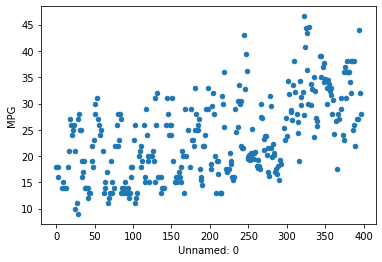

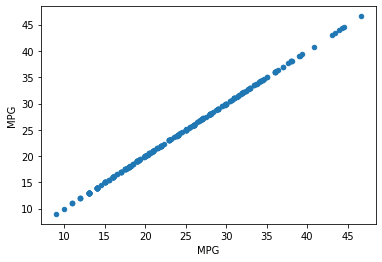

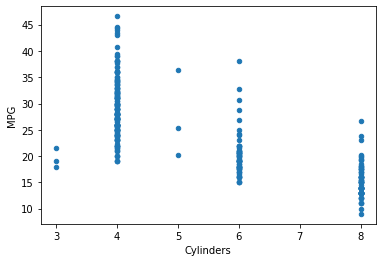

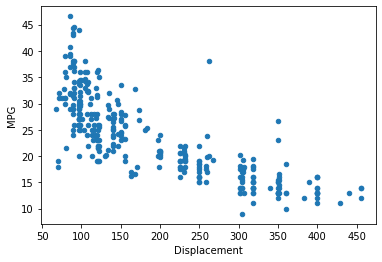

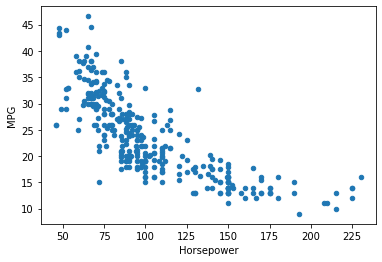

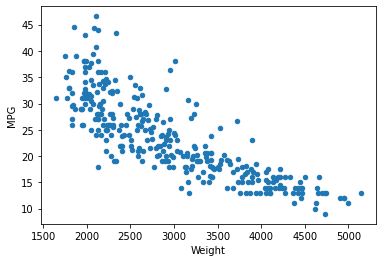

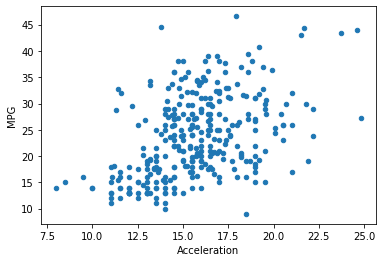

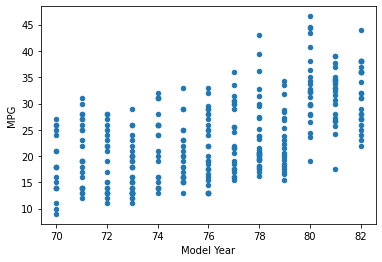

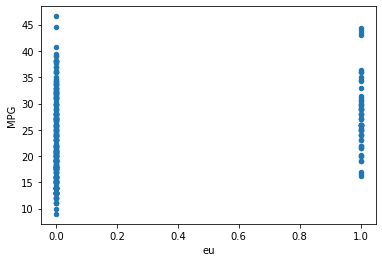

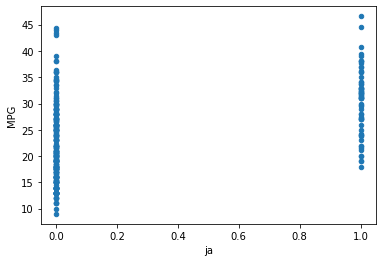

In [ ]:
colname = train_val.columns
for name in colname:
    train_val.plot(kind = 'scatter', x = name, y = 'MPG')

マハラノビス距離を計算

まずはインデックスをリセット（**紆余曲折の結果、この処理にたどり着く**）

In [ ]:
train_val = train_val.reset_index()
train_val

,index,Unnamed: 0,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,eu,ja
0,64,64,15.0,8,318.0,150.0,4135,13.5,72,0,0
1,55,55,27.0,4,97.0,60.0,1834,19.0,71,1,0
2,317,317,34.3,4,97.0,78.0,2188,15.8,80,1,0
3,102,102,26.0,4,97.0,46.0,1950,21.0,73,1,0
4,358,358,31.6,4,120.0,74.0,2635,18.3,81,0,1
...,...,...,...,...,...,...,...,...,...,...,...
313,323,323,27.9,4,156.0,105.0,2800,14.4,80,0,0
314,192,192,22.0,6,250.0,105.0,3353,14.5,76,0,0
315,117,117,29.0,4,68.0,49.0,1867,19.5,73,1,0
316,47,47,19.0,6,250.0,100.0,3282,15.0,71,0,0


In [ ]:
from sklearn.covariance import MinCovDet

#数値列を適当に取り出す
# train_val2=train_val.loc[:,["MPG","Displacement","Horsepower","Weight","Acceleration"]]
train_val2=train_val.loc[:,"MPG":"ja"]
#train_val2=train_val2.dropna()#欠損値を削除

#train_val2に対して、各データの中心点からのマハラノビス距離を計算

mcd = MinCovDet(random_state=0,support_fraction=0.7)
mcd.fit(train_val2)
#マハラノビス距離
distance = mcd.mahalanobis(train_val2)
distance

array([  5.71925124,  18.1217061 ,  10.90479324,  22.45470715,
         8.23685417,   5.49539591,   5.13696956,   4.95729653,
        48.06210028,  15.01396708,  20.19450757, 105.42299579,
        26.68742976,   9.81681071,  40.81040874,   6.8433779 ,
        30.36526923,  11.07108449,   6.30347641,  25.56620178,
         8.17054759,   7.84141087,   6.38751555,  10.81619184,
        11.57677628,   6.8789968 ,   9.83457583,  18.50982362,
         4.34984342,  12.96278286,   9.32232711,   8.44420325,
         7.00652841,   7.4872979 ,  10.4696218 ,   4.73802322,
        10.27921955,   5.45835902,   5.23698778,  38.62454051,
         9.11114263,  10.08780901,   9.95462407,  16.03216878,
         5.25703537,  23.55929408,   5.34941245,   6.23841134,
         6.23951757,   8.31001854,   6.76780433,  11.09233096,
         1.97819286,   4.02217194,  11.08662748,  87.04283236,
        19.3931783 ,   9.0903769 ,   7.97941536,   3.2249125 ,
        14.64904734,   7.49743087,   7.58622614,  25.02

In [ ]:
train_val2.index

RangeIndex(start=0, stop=318, step=1)

In [ ]:
train_val2.shape

(318, 9)

箱ひげ図で外れ値を見てみる

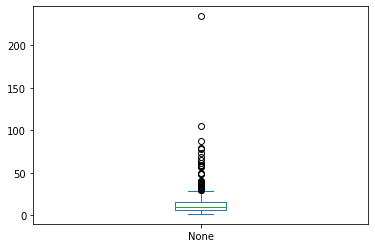

In [ ]:
distance=pd.Series(distance)
distance.plot(kind="box")

基本統計量を計算する

In [ ]:
tmp=distance.describe()#様々な基本統計量を計算
tmp

count    318.000000
mean      15.125743
std       18.972215
min        1.631965
25%        6.614269
50%        9.594614
75%       15.702181
max      234.251330
dtype: float64

四分位範囲を用いて外れ値を判定する

In [ ]:
IQR = tmp['75%'] -tmp['25%']#IQR計算
jougen = 1.5*(IQR) + tmp['75%'] # 上限値
kagen = tmp['25%'] -1.5*(IQR) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outliner = distance[ (distance > jougen) | (distance < kagen) ]
outliner

8       48.062100
11     105.422996
14      40.810409
16      30.365269
39      38.624541
55      87.042832
65      33.084490
67      79.297240
68      37.526131
72      29.907404
109     73.359890
111     57.438646
122     58.254003
128     50.005383
131     31.738708
135     38.503962
146     34.563951
147    234.251330
172     61.894897
185     32.192806
189     37.144650
197     29.564933
225     65.111898
227     78.444048
247     48.067819
267     69.080643
271     59.337924
279     37.304182
288     35.837946
293     56.337646
303     33.599923
307     40.207948
308     37.629000
309     38.531529
dtype: float64

外れ値のインデックスを求めて

In [ ]:
outliner.index

Int64Index([  8,  11,  14,  16,  39,  55,  65,  67,  68,  72, 109, 111, 122,
            128, 131, 135, 146, 147, 172, 185, 189, 197, 225, 227, 247, 267,
            271, 279, 288, 293, 303, 307, 308, 309],
           dtype='int64')

そのインデックスをもとに外れ値を削除

In [ ]:
train_val2.drop([  8,  11,  14,  16,  39,  55,  65,  67,  68,  72, 109, 111, 122,128, 131, 135, 146, 147, 172, 185, 189, 197, 225, 227, 247, 267,271, 279, 288, 293, 303, 307, 308, 309], inplace=True)

In [ ]:
train_val2.shape

(284, 9)

再び散布図を見てみる

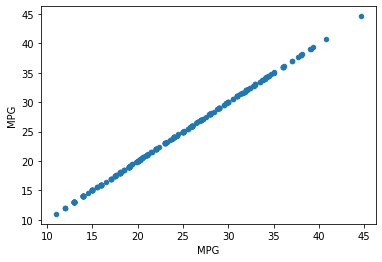

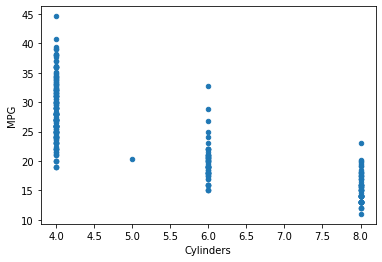

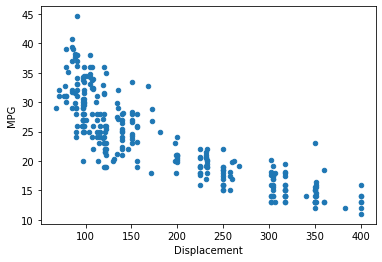

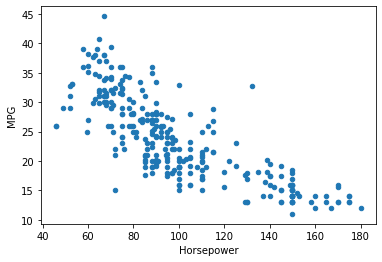

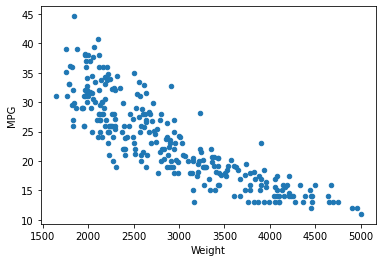

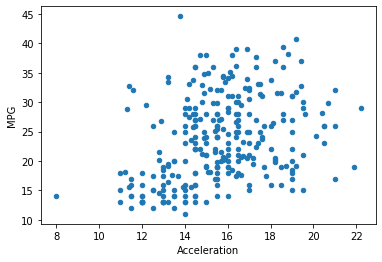

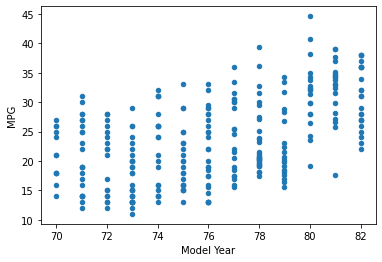

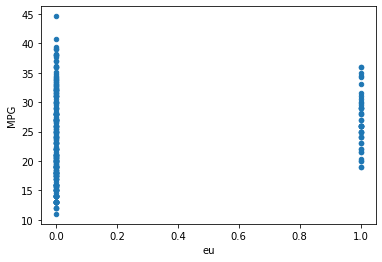

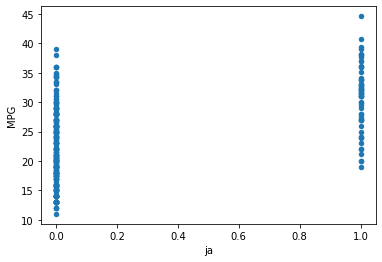

In [ ]:
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x = name, y = 'MPG')

再び、マハラノビス距離を求めてみる（おまけ）

In [ ]:
#train_val2に対して、各データの中心点からのマハラノビス距離を計算

mcd = MinCovDet(random_state=0,support_fraction=0.7)
mcd.fit(train_val2)
#マハラノビス距離
distance = mcd.mahalanobis(train_val2)
distance

array([ 5.65094655, 22.53565084, 14.21065598, 26.45099384,  8.29311434,
        5.55441867,  5.51946603,  5.04839819, 19.52590224, 21.88361289,
       31.20807512,  9.84673674,  7.22131375, 11.68781143,  6.95415984,
       28.72386833,  9.51390102,  8.04218222,  6.76915375, 11.21644808,
       12.88697344,  7.13986216,  9.71306049, 18.80480696,  4.20461259,
       15.23168261, 10.99811488,  9.29166004,  8.0763283 ,  7.70970949,
       10.63109442,  5.10577058, 10.54586317,  5.67972207,  5.13833961,
        9.2978382 , 10.6180349 , 10.0403793 , 21.10795212,  5.25031232,
       23.89829071,  5.23402116,  6.47610411,  7.91001464,  9.22381903,
        6.54007422, 13.04155924,  2.01400044,  4.37773333, 13.16479001,
       24.28852854,  9.48286152,  9.40200167,  3.19906851, 16.70911918,
        9.85430112,  8.05669798, 26.7962716 ,  8.87398426, 11.04807938,
       19.45085934,  7.69876266, 14.86416758,  7.2766115 , 22.65853938,
        3.65153206, 20.93149028, 32.82858523,  2.05747261,  9.34

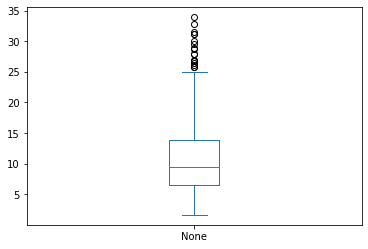

In [ ]:
distance=pd.Series(distance)
distance.plot(kind="box")

In [ ]:
tmp=distance.describe()#様々な基本統計量を計算
tmp

count    284.000000
mean      11.439408
std        6.755314
min        1.643918
25%        6.509389
50%        9.511685
75%       13.894881
max       33.917446
dtype: float64

In [ ]:
IQR = tmp['75%'] -tmp['25%']#IQR計算
jougen = 1.5*(IQR) + tmp['75%'] # 上限値
kagen = tmp['25%'] -1.5*(IQR) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outliner = distance[ (distance > jougen) | (distance < kagen) ]
outliner

3      26.450994
10     31.208075
15     28.723868
57     26.796272
67     32.828585
83     26.197202
84     25.795920
98     27.900442
102    27.009685
103    31.463979
162    29.602505
184    33.917446
187    31.137394
188    27.961130
189    25.780400
195    26.784379
269    28.851432
276    29.995492
dtype: float64

列同士の相関係数を調べる

In [ ]:
train_val2.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,eu,ja
MPG,1.000000,-0.800923,-0.843093,-0.800398,-0.855803,0.358897,0.529855,0.188596,0.522577
Cylinders,-0.800923,1.000000,0.960382,0.879482,0.896959,-0.522010,-0.300902,-0.355730,-0.384107
Displacement,-0.843093,0.960382,1.000000,0.911461,0.950287,-0.525525,-0.294627,-0.367738,-0.444808
Horsepower,-0.800398,0.879482,0.911461,1.000000,0.899163,-0.674347,-0.323333,-0.262147,-0.365173
Weight,-0.855803,0.896959,0.950287,0.899163,1.000000,-0.421526,-0.243245,-0.313149,-0.454162
Acceleration,0.358897,-0.522010,-0.525525,-0.674347,-0.421526,1.000000,0.207026,0.068540,0.175293
Model Year,0.529855,-0.300902,-0.294627,-0.323333,-0.243245,0.207026,1.000000,-0.116146,0.200920
eu,0.188596,-0.355730,-0.367738,-0.262147,-0.313149,0.068540,-0.116146,1.000000,-0.227532
ja,0.522577,-0.384107,-0.444808,-0.365173,-0.454162,0.175293,0.200920,-0.227532,1.000000


In [ ]:
train_cor = train_val2.corr()['MPG']
train_cor

MPG             1.000000
Cylinders      -0.800923
Displacement   -0.843093
Horsepower     -0.800398
Weight         -0.855803
Acceleration    0.358897
Model Year      0.529855
eu              0.188596
ja              0.522577
Name: MPG, dtype: float64

絶対値に変換

In [ ]:
abs_cor = train_cor.map(abs)
abs_cor

MPG             1.000000
Cylinders       0.800923
Displacement    0.843093
Horsepower      0.800398
Weight          0.855803
Acceleration    0.358897
Model Year      0.529855
eu              0.188596
ja              0.522577
Name: MPG, dtype: float64

降順に並び替える

In [ ]:
abs_cor.sort_values(ascending = False)

MPG             1.000000
Weight          0.855803
Displacement    0.843093
Cylinders       0.800923
Horsepower      0.800398
Model Year      0.529855
ja              0.522577
Acceleration    0.358897
eu              0.188596
Name: MPG, dtype: float64

特徴量として相関の大きいWeight,Displacement,Cylinders,Horsepower,Model Year,jaを利用することにする       

In [ ]:
col =['Weight','Displacement','Cylinders','Horsepower','Model Year','ja']
x = train_val2[col]
t = train_val2[['MPG']]

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

データの標準化

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x_train)
sc_x # 表示

array([[ 0.94380425,  1.23751031,  1.57650372,  1.61336607, -0.88724019,
        -0.49724516],
       [ 1.44237759,  1.38278515,  1.57650372,  1.29519149,  0.52117606,
        -0.49724516],
       [ 2.12424995,  1.21675676,  1.57650372,  1.29519149, -0.60555694,
        -0.49724516],
       ...,
       [-1.11769876, -0.91048193, -0.80927191, -1.02748294,  0.23949281,
         2.01108042],
       [ 0.17028237,  0.4800058 ,  0.3836159 ,  0.34066775, -0.32387369,
        -0.49724516],
       [-0.70833095, -0.87935161, -0.80927191, -0.7249801 ,  1.3662258 ,
        -0.49724516]])

平均値がほぼ0になっていることを確認

In [ ]:
# array 型だと見づらいのでデータフレームに変換
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)
# 平均値の計算
tmp_df.mean()

Weight          2.328045e-16
Displacement   -4.108314e-17
Cylinders       1.594417e-16
Horsepower      5.722295e-17
Model Year      1.835047e-15
ja             -3.472504e-17
dtype: float64

標準偏差がほぼ1になっていることを確認

In [ ]:
tmp_df.std() # 標準偏差の計算

Weight          1.00221
Displacement    1.00221
Cylinders       1.00221
Horsepower      1.00221
Model Year      1.00221
ja              1.00221
dtype: float64

正解データも標準化する

In [ ]:
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

標準化したデータで学習してみる

In [ ]:
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

検証データも標準化してから決定係数を求める

In [ ]:
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
# 標準化した検証データで決定係数を計算
model.score(sc_x_val, sc_y_val)

0.8833301485584578

この時点でいい感じ！C

チューニングをしやすいようにlearn関数を定義

In [ ]:
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

learn関数を使い、訓練データと検証データで決定係数を求める

In [ ]:
col =['Weight','Displacement','Cylinders','Horsepower','Model Year','ja']
x = train_val2[col]
t = train_val2[['MPG']]

s1,s2 = learn(x, t)
print(s1, s2)

0.849334101419354 0.8833301485584578


いろいろチューニングする
→Displacement(排気量)の3乗値を加えるとなかなか良さそうだ

In [ ]:
# x['Weight']=x['Weight']**2
x['Displacement']=x['Displacement']**3
# x['Cylinders']=x['Cylinders']**3
s1,s2 = learn(x, t)
print(s1, s2)

0.8639733237743115 0.9003466454438154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


検証データでの決定係数が0.9を超えてかなり満足b

そこで、リッジ回帰を試す

標準化を行い、2,3乗列と交互作用項を追加する

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x)

# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x)

sc_model_y = StandardScaler()
sc_model_y.fit(t)

sc_y = sc_model_y.transform(t)

pf = PolynomialFeatures(degree = 3, include_bias = False)
pf_x = pf.fit_transform(sc_x) # 2,3乗列と交互作用項の追加
pf_x.shape # 行数と列数

(284, 83)

線形回帰で過学習が起こることを確認

In [ ]:
from sklearn.linear_model import LinearRegression

x_train, x_val, y_train, y_val = train_test_split(pf_x,
    sc_y, test_size = 0.3, random_state = 0)
model = LinearRegression()
model.fit(x_train, y_train)

print(model.score(x_val, y_val)) # 訓練データの決定係数

-57244360774791.3


よくわからない結果になったので見なかったことにする

リッジ回帰をしてみると

In [ ]:
from sklearn.linear_model import Ridge # モジュールインポート
# モデルの作成
ridgeModel = Ridge(alpha = 10)
ridgeModel.fit(x_train, y_train) # 学習
print(ridgeModel.score(x_train, y_train))
print(ridgeModel.score(x_val, y_val))

0.9094743795750494
0.9333385993082661


かなり良い結果が出た！

さらに、正規化項の定数を0.01刻みで検証する

In [ ]:
maxScore = 0
maxIndex = 0
# range関数により整数列を1～2000生成
for i in range(1, 2001):
    num = i/100
    ridgeModel = Ridge(random_state = 0, alpha = num)
    ridgeModel.fit(x_train, y_train)
    result = ridgeModel.score(x_val, y_val)
    if result > maxScore:
        maxScore = result
        maxIndex = num

print(maxIndex, maxScore)

9.16 0.9333589321825809


正規化項9.16でモデルを再作成

In [ ]:
ridgeModel = Ridge(alpha = 9.16)
ridgeModel.fit(x_train, y_train) # 学習
print(ridgeModel.score(x_train, y_train))
print(ridgeModel.score(x_val, y_val))

0.9100507382740975
0.9333589321825809


もう満足だが、ラッソ回帰もやってみる

In [ ]:
from sklearn.linear_model import Lasso

x_train, x_val, y_train, y_val = train_test_split(pf_x,
    sc_y, test_size = 0.3, random_state = 0)

# ラッソ回帰のモデル作成（alphaは正則化項につく定数）
model = Lasso(alpha = 0.1)
model.fit(x_train, y_train)

print(model.score(x_train, y_train)) # 訓練データの決定係数
print(model.score(x_val, y_val)) # テストデータの決定係数

0.8200177990482742
0.8951138031983791


回帰木も試す（試行錯誤のすえ、木の最大深さは6にする）

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_train, x_val, y_train, y_val = train_test_split(pf_x,
    sc_y, test_size = 0.3, random_state = 0)

# 木の深さの最大を6と設定←いろいろ試した結果6がよかった
model = DecisionTreeRegressor(max_depth = 6,
random_state = 0)
model.fit(x_train, y_train)
model.score(x_val, y_val) # テストデータでの決定係数

0.8361375563113129

結論

重回帰分析:0.8833301485584578

チューニング（排気量の3乗）後:0.9003466454438154

累乗列と交互作用特徴量を一括追加してから

  リッジ回帰:0.9333385993082661
  
  さらに正規化項を調整0.9333589321825809

  ラッソ回帰:0.8951138031983791

  回帰木:0.8361375563113129



リッジ回帰を利用し、テストデータでの評価を行う

まずはテストデータでの前処理

欠損値の確認

In [ ]:
test.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      1
Weight          0
Acceleration    0
Model Year      0
eu              0
ja              0
dtype: int64

欠損値を教師あり学習により補完

In [ ]:
non_df = test.dropna() # 欠損値を含む行を削除


from sklearn.linear_model import LinearRegression
x = non_df.loc[:,["MPG","Cylinders"	,"Displacement","Weight","Acceleration","Model Year","eu","ja"]]
t = non_df['Horsepower']
model = LinearRegression()
model.fit(x,t) # 欠損値予測のためのモデルを予測

LinearRegression()

In [ ]:
# 欠損行の抜き出し
condition = test['Horsepower'].isnull()
non_data = test.loc[ condition ]


# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測
x = non_data.loc[:,["MPG","Cylinders"	,"Displacement","Weight","Acceleration","Model Year","eu","ja"]]
pred = model.predict(x)


# 欠損行のHorsepowerのマスを抜き出して、predで代入
test.loc[condition,'Horsepower']=pred

欠損値がなくなったことを確認

In [ ]:
test.isnull().sum()

Unnamed: 0      0
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
eu              0
ja              0
dtype: int64

データをxとtに分割する

In [ ]:
test2=test.loc[:,"MPG":"ja"]

col =['Weight','Displacement','Cylinders','Horsepower','Model Year','ja']
x = test2[col]
t = test2[['MPG']]

標準化や2,3乗列・交互作用項の追加を行う

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x)

# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x)

sc_model_y = StandardScaler()
sc_model_y.fit(t)

sc_y = sc_model_y.transform(t)

pf = PolynomialFeatures(degree = 3, include_bias = False)
pf_x = pf.fit_transform(sc_x) # 2,3乗列と交互作用項の追加
pf_x.shape # 行数と列数

(80, 83)

リッジ回帰モデルで決定係数を求める

In [ ]:
print(ridgeModel.score(pf_x, sc_y))

0.8334931286263619


モデルを保存する

標準化のためのオブジェクトも保存する

In [ ]:
import pickle
with open('auto_mpg.pkl',"wb") as f:
    pickle.dump(ridgeModel,f)
with open('auto_scx.pkl','wb') as f:
    pickle.dump(sc_model_x,f)
with open('auto_scy.pkl','wb') as f:
    pickle.dump(sc_model_y,f)
